In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from generation.data.data_preparation import get_attributes_df, \
                                             get_detector_event_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [2]:
df = get_attributes_df()

# Detectors

In [3]:
colors = ['black', 'dimgray', 'lightcoral', 'maroon',
          'orangered', 'chocolate', 'tan', 'orange',
          'olive', 'yellow', 'chartreuse', 'forestgreen',
          'turquoise', 'deepskyblue', 'navy', 'mediumpurple',
          'fuchsia', 'pink']

9it [00:13,  1.48s/it]


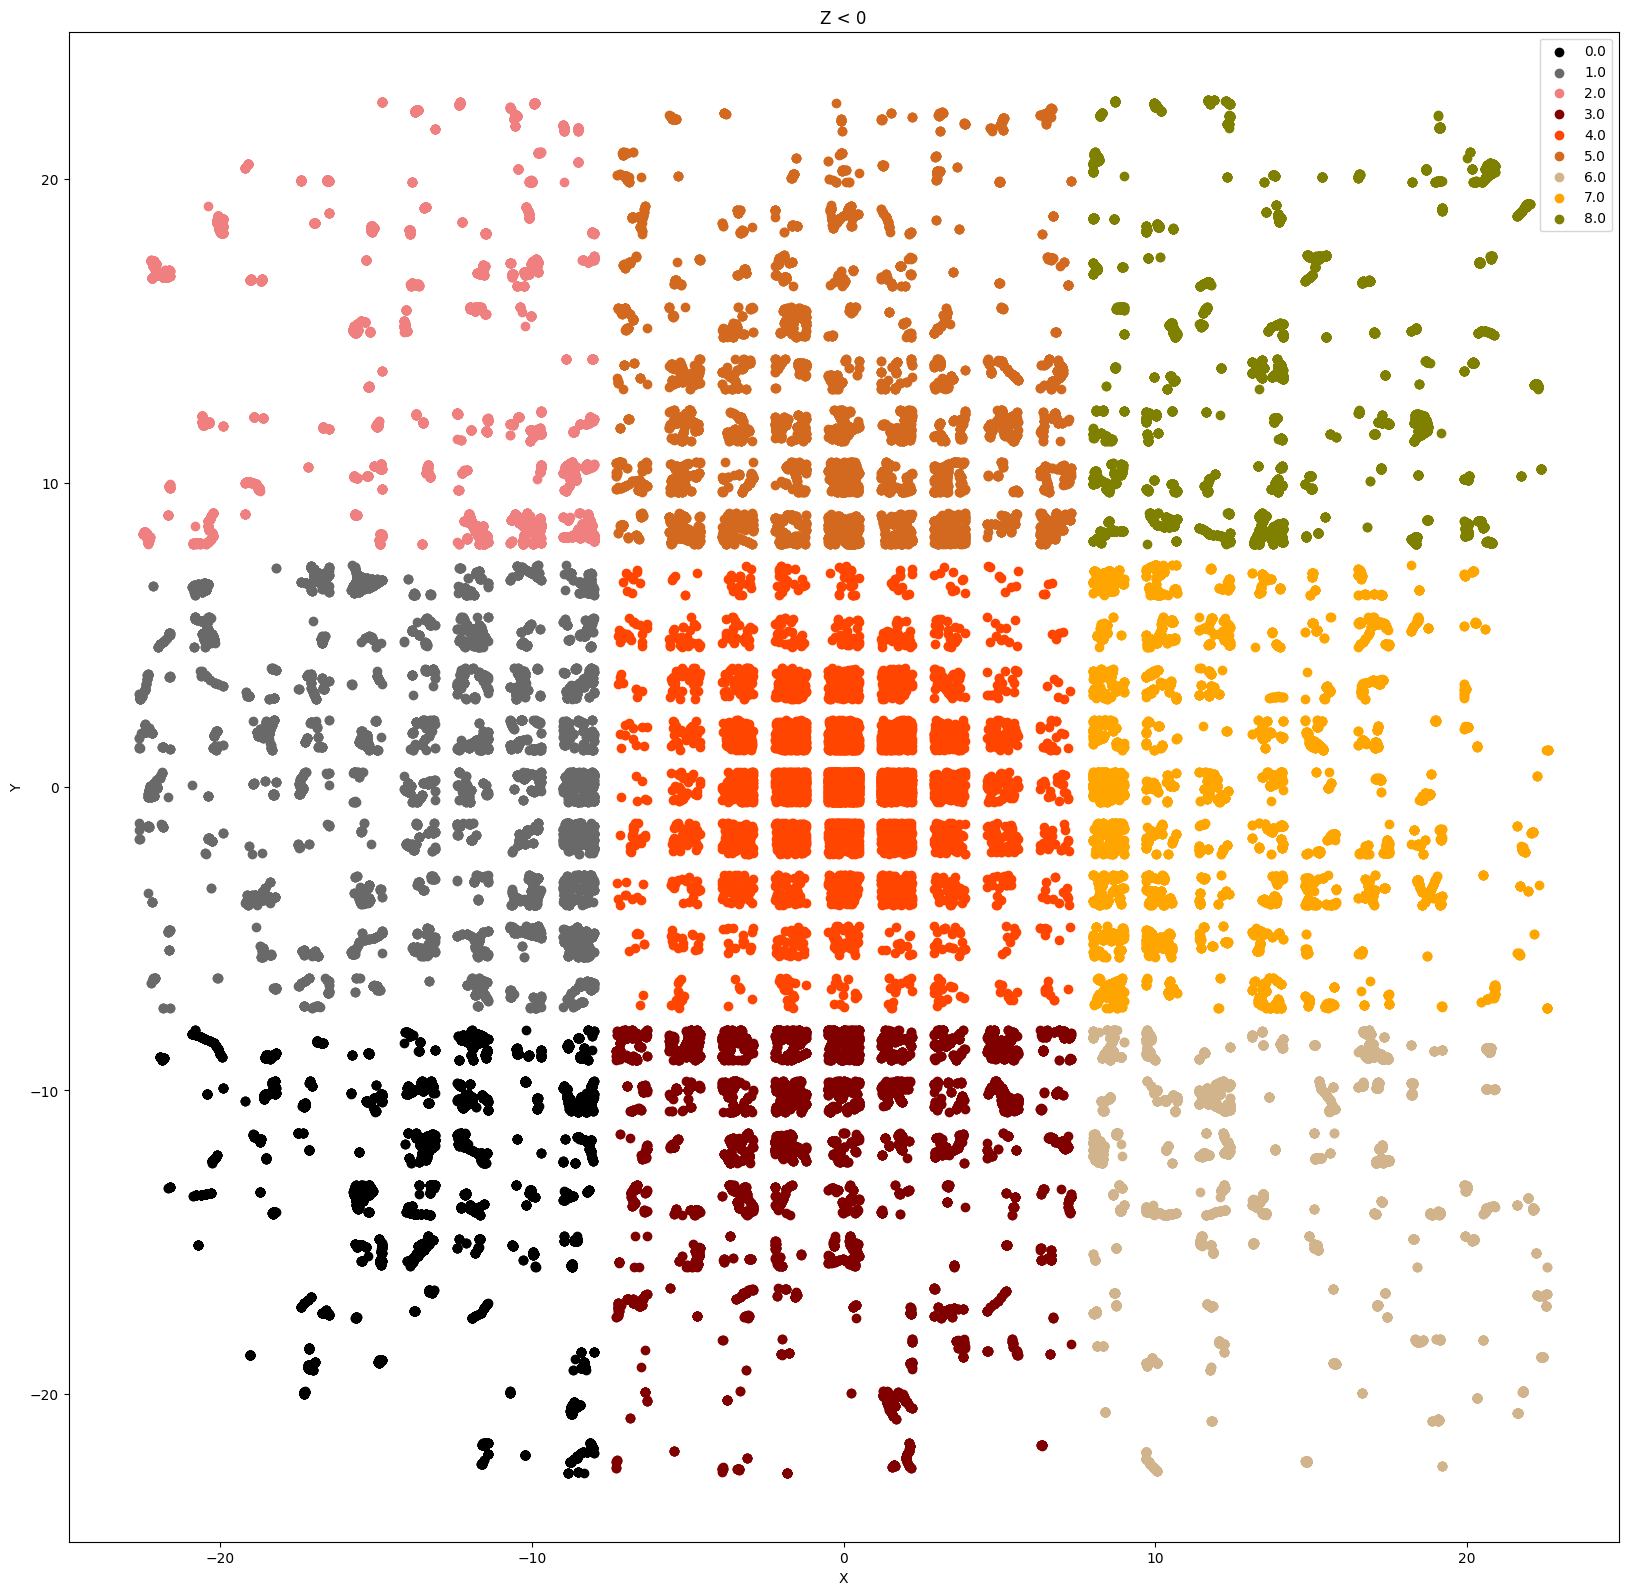

In [4]:
SAMPLES_PER_DETECTOR = 10000
negative_df = df[df['z'] < 0]

detectors = set(sorted(negative_df['detector'].unique()))

plt.figure(figsize=(20, 20), dpi=100)
plt.title("Z < 0")
for i, detector_num in tqdm.tqdm(enumerate(detectors)):
    detector_df = negative_df[negative_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    x_values = detector_df['x']
    y_values = detector_df['y']

    plt.scatter(x_values, y_values, c=colors[i])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

9it [00:08,  1.06it/s]


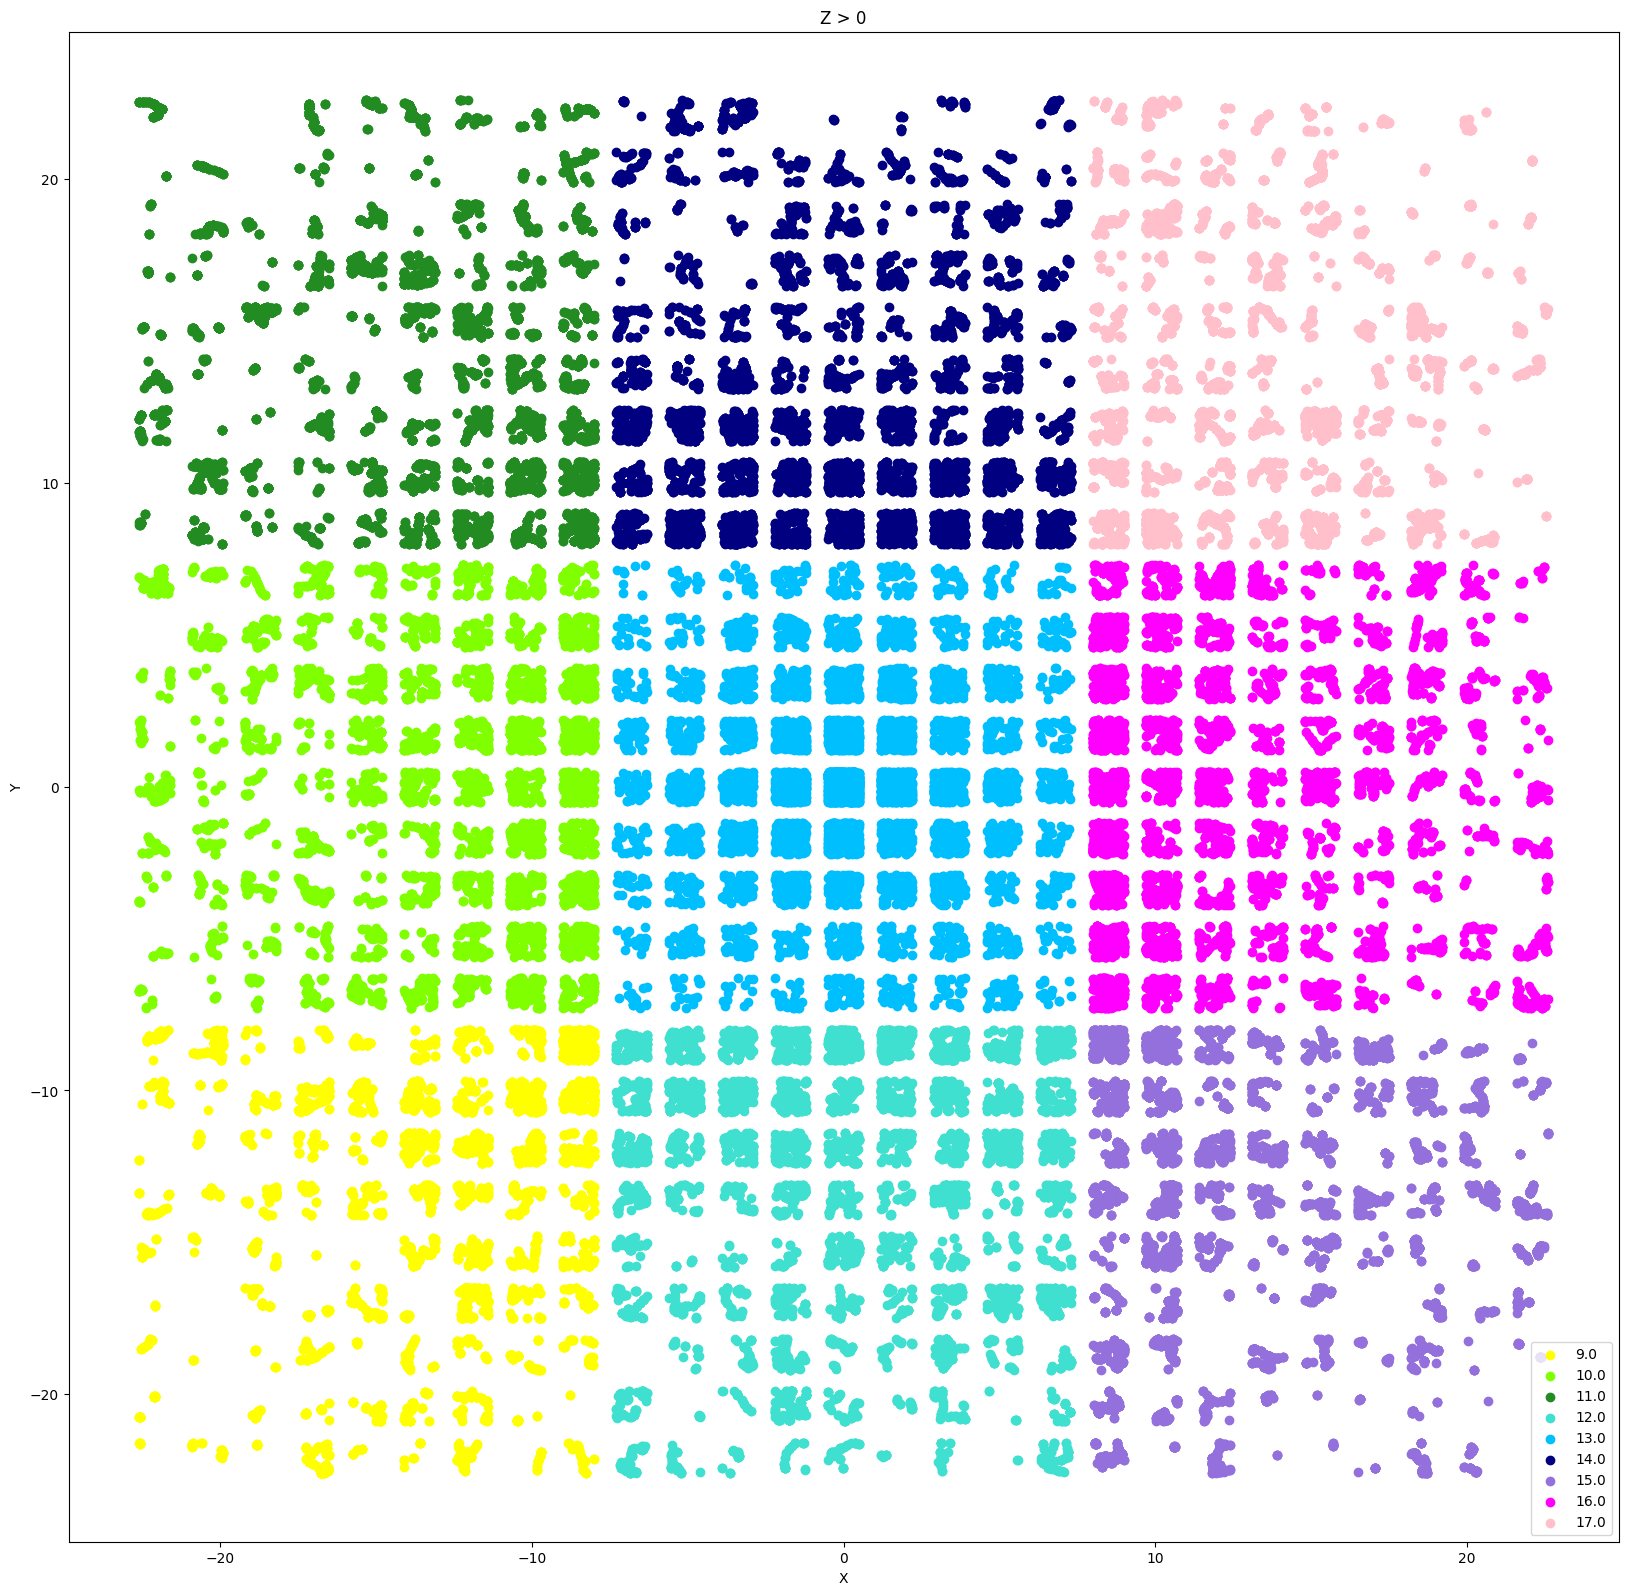

In [5]:
SAMPLES_PER_DETECTOR = 10000
positive_df = df[df['z'] > 0]

detectors = set(sorted(positive_df['detector'].unique()))

plt.figure(figsize=(20, 20), dpi=100)
plt.title("Z > 0")
for i, detector_num in tqdm.tqdm(enumerate(detectors)):
    detector_df = positive_df[positive_df['detector'] == detector_num].sample(SAMPLES_PER_DETECTOR)
    x_values = detector_df['x']
    y_values = detector_df['y']

    plt.scatter(x_values, y_values, c=colors[i + len(detectors)])
    plt.xlabel("X")
    plt.ylabel("Y")
plt.legend(detectors)
plt.show()

# Energy

In [6]:
detectors = sorted(df['detector'].unique())
events_num = {detector: None for detector in detectors}
data_size = {detector: None for detector in detectors}


for detector in detectors:
    detector_df = get_detector_event_df(df, detector=detector)
    data_size[detector] = len(detector_df)
    event_num = detector_df['event'].nunique()
    events_num[detector] = event_num
    print("Detector: {}, events number: {}".format(int(detector), event_num))

Detector: 0, events number: 52
Detector: 1, events number: 62
Detector: 2, events number: 45
Detector: 3, events number: 59
Detector: 4, events number: 74
Detector: 5, events number: 66
Detector: 6, events number: 47
Detector: 7, events number: 63
Detector: 8, events number: 51
Detector: 9, events number: 71
Detector: 10, events number: 74
Detector: 11, events number: 72
Detector: 12, events number: 74
Detector: 13, events number: 74
Detector: 14, events number: 74
Detector: 15, events number: 74
Detector: 16, events number: 74
Detector: 17, events number: 72


### Photon count

100%|██████████| 9/9 [01:51<00:00, 12.39s/it]


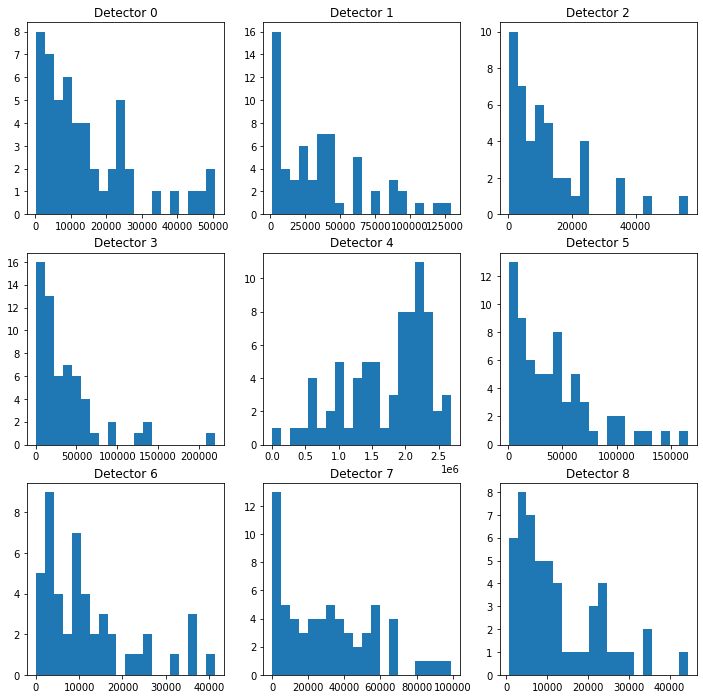

In [7]:
f, ax = plt.subplots(3, 3, figsize=(12,12))

detectors = list(map(int, sorted(df['detector'].unique())))
detectors_num = len(detectors)
for detector in tqdm.tqdm(detectors[:detectors_num//2]):
    detector_df = get_detector_event_df(df, detector=detector)
    photon_counts = detector_df.groupby('event').count()['x'].values
    ax[detector//3][detector%3].set_title(f'Detector {detector}')
    ax[detector//3][detector%3].hist(photon_counts, bins=20)
plt.show()

100%|██████████| 9/9 [01:28<00:00,  9.86s/it]


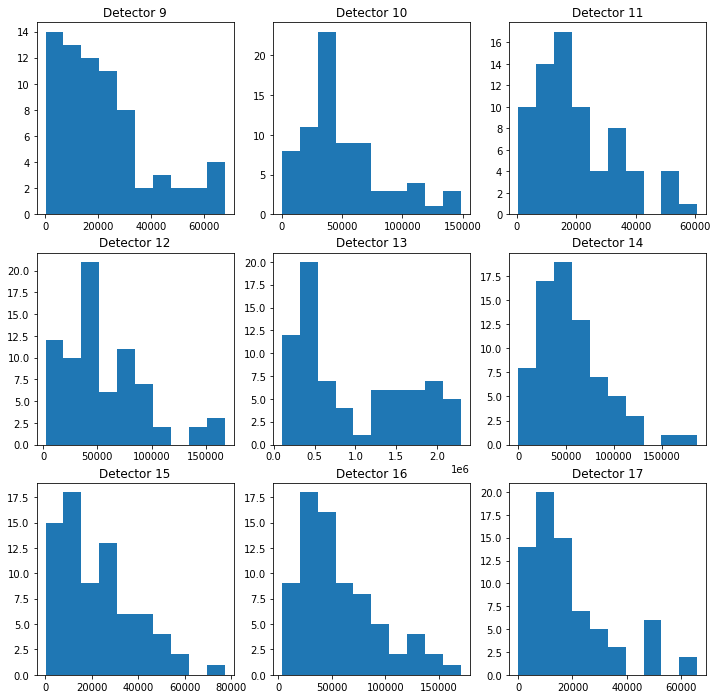

In [8]:
f, ax = plt.subplots(3, 3, figsize=(12,12))

detectors = list(map(int, sorted(df['detector'].unique())))
detectors_num = len(detectors)
for detector in tqdm.tqdm(detectors[detectors_num//2:]):
    detector_df = get_detector_event_df(df, detector=detector)
    photon_counts = detector_df.groupby('event').count()['x'].values
    ax[(detector - 9)//3][(detector - 9)%3].set_title(f'Detector {detector}')
    ax[(detector - 9)//3][(detector - 9)%3].hist(photon_counts)
plt.show()

### Signals shape

100%|██████████| 9/9 [11:03<00:00, 73.71s/it] 


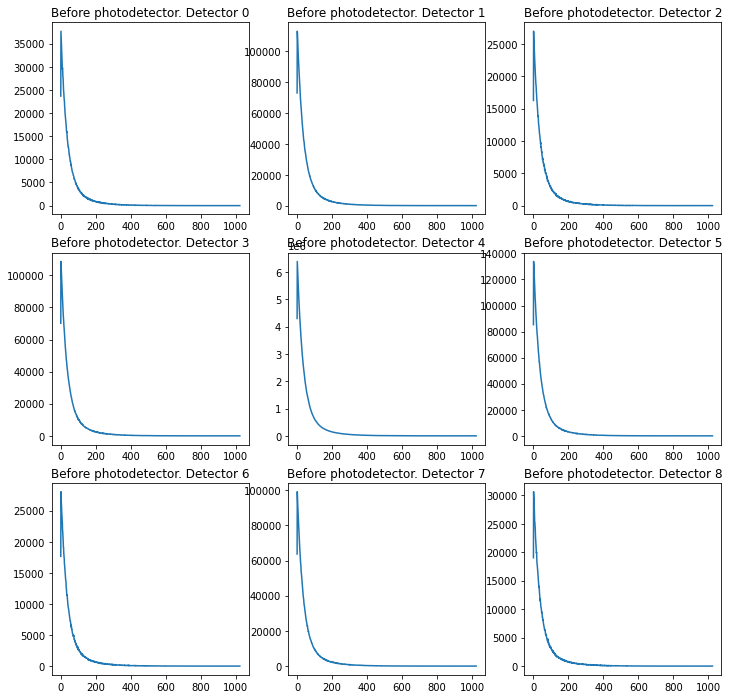

In [9]:
f, ax = plt.subplots(3, 3, figsize=(12, 12))

detectors = list(map(int, sorted(df['detector'].unique())))
detectors_num = len(detectors)
for detector in tqdm.tqdm(detectors[:detectors_num//2]):
    detector_df = get_detector_event_df(df, detector=detector)
    signal_output = generate_one_signal(detector_df, signal_size=1024, sample_coef=1)
    processed_signal_output = postprocess_signal(signal_output)
    ax[detector//3][detector%3].set_title(f'Before photodetector. Detector {detector}')
    ax[detector//3][detector%3].plot(signal_output)
#     ax[3 + detector//3][detector%3].set_title(f'After photodetector. Detector {detector}')
#     ax[3 + detector//3][detector%3].plot(processed_signal_output)
plt.show()